# **Predictive Analytics - Time Series Analysis and Forecasting**
**<span style="text-align: center">Author - @attharvaj</span>**


---



### Import libraries

In [1]:
# hi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
calendar_df = pd.read_csv("/content/gdrive/My Drive/PredictiveAnalyticsData/calendar.csv")
sales_train = pd.read_csv("/content/gdrive/My Drive/PredictiveAnalyticsData/sales_train_validation.csv")
sales_price = pd.read_csv("/content/gdrive/My Drive/PredictiveAnalyticsData/sell_prices.csv")
sales_evaluation = pd.read_csv("/content/gdrive/My Drive/PredictiveAnalyticsData/sales_train_evaluation.csv")

In [4]:
calendar_df.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
sales_train.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
sales_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
print("Shape of calender.csv:",calendar_df.shape)
print("Shape of sales train validation.csv:",sales_train.shape)
print("Shape of sell_price.csv:",sales_price.shape)
print("Shape of sales train evaluation.csv:",sales_evaluation.shape)

Shape of calender.csv: (1969, 14)
Shape of sales train validation.csv: (30490, 1919)
Shape of sell_price.csv: (6841121, 4)
Shape of sales train evaluation.csv: (30490, 1947)


### Initialize preprocessing

In [ ]:
calendar_df=calendar_df.fillna(value='no_event')

In [ ]:
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


In [ ]:
l=[]
for i in range(1,1914):
  l.append("d_"+str(i))

In [ ]:
df_final = pd.melt(sales_train,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
df_final.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [7]:
df_final.shape

NameError: ignored

In [ ]:
l=[]
for i in range(1914,1942):
  l.append("d_"+str(i))
df_final_test=pd.melt(sales_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
df_final_test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,1


In [ ]:
df_final_test.shape

(853720, 8)

In [ ]:
for i in range(1942,1970):
    sales_evaluation['d_'+str(i)]=0

In [ ]:
l=[]
for i in range(1942,1970):
    l.append("d_"+str(i))
df_future_data=pd.melt(sales_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
data=df_final.merge(calendar_df,on='d',copy=False)
data=data.merge(sales_price,on=["store_id", "item_id", "wm_yr_wk"],copy=False)



In [ ]:
data.to_csv('/content/gdrive/My Drive/PredictiveAnalyticsData/input_data/final_dataframe.csv',index=False)

df=('calendar.csv')<br>
df1=('sales_train_validation.csv') #this is used for training<br>
df2=('sell_prices.csv')<br>
df3=('sales_train_evaluation.csv') # this is used for testing

In [ ]:
#Now we merge all These 3 dataframes to get final csv file test
data_test=df_final_test.merge(calendar_df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_test=data_test.merge(sales_price,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv


In [ ]:
data_test.to_csv('/content/gdrive/My Drive/PredictiveAnalyticsData/input_data/final_dataframe_test.csv',index=False)

In [ ]:
#Now we merge all These 3 dataframes to get final csv file future data
data_future=df_future_data.merge(calendar_df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_future=data_future.merge(sales_price,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_future_data.csv
data_future.fillna('no_event',inplace=True)

In [ ]:
data_future.to_csv('/content/gdrive/My Drive/PredictiveAnalyticsData/input_data/final_future_data.csv',index=False)

In [ ]:
print("Shape of final dataframe train is=",data.shape)
print("Shape of final dataframe test is=",data_test.shape)

Shape of final dataframe train is= (46027957, 22)
Shape of final dataframe test is= (853720, 22)


### Preliminary Data Exploration

In [ ]:
#reading up complete dataframe
data=pd.read_csv('/content/gdrive/My Drive/PredictiveAnalyticsData/input_data/final_dataframe.csv')
# data=pd.read_csv('final_dataframe.csv')
data_test=pd.read_csv('/content/gdrive/My Drive/PredictiveAnalyticsData/input_data/final_dataframe_test.csv')

In [ ]:
print("Head rows of Final DataFrame train")
data.head()

Head rows of Final DataFrame train


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,no_event,no_event,no_event,no_event,1,1,0,0.46
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,no_event,no_event,no_event,no_event,1,0,1,0.46


In [ ]:
print("Colums present in dataFrame are",data.columns.values)

Colums present in dataFrame are ['id' 'item_id' 'dept_id' 'cat_id' 'store_id' 'state_id' 'd' 'sales'
 'date' 'wm_yr_wk' 'weekday' 'wday' 'month' 'year' 'event_name_1'
 'event_type_1' 'event_name_2' 'event_type_2' 'snap_CA' 'snap_TX'
 'snap_WI' 'sell_price']


In [ ]:
print("Complete information about data Frame is:-\n")
print(data.info())

Complete information about data Frame is:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 7.5+ GB
None


**Clearly this data frame is using a lot memory(7.7+GB) so we will try to remove unnecessary features while doing Feature Engineering**

In [ ]:
print("There are these unique stores in this data=",data['store_id'].unique())

There are these unique stores in this data= ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [ ]:
print("There are these sates in data=",data['state_id'].unique())

There are these sates in data= ['CA' 'TX' 'WI']


In [ ]:
print("Unique values of wday features=",data['wday'].unique())
print("Unique values of weekday features=",data['weekday'].unique())

Unique values of wday features= [1 2 3 4 5 6 7]
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


1. From this I get that 1 in wday corresponds to Saturday in weekday,2 for Sunday and so on.

In [ ]:
print("Years for which I have this sales data=",data['year'].unique())

Years for which I have this sales data= [2011 2012 2013 2014 2015 2016]


In [ ]:
print("Months in year 2016 for which we have data",data[data['year']==2016]['month'].unique())

Months in year 2016 for which we have data [1 2 3 4]


### Exploratory Data Analysis

1. Some Bar Plots of Pie Charts of sales<br>
A. Bargraph for Average sales for each category & Pie chart showing percentage of sales for each category

Train

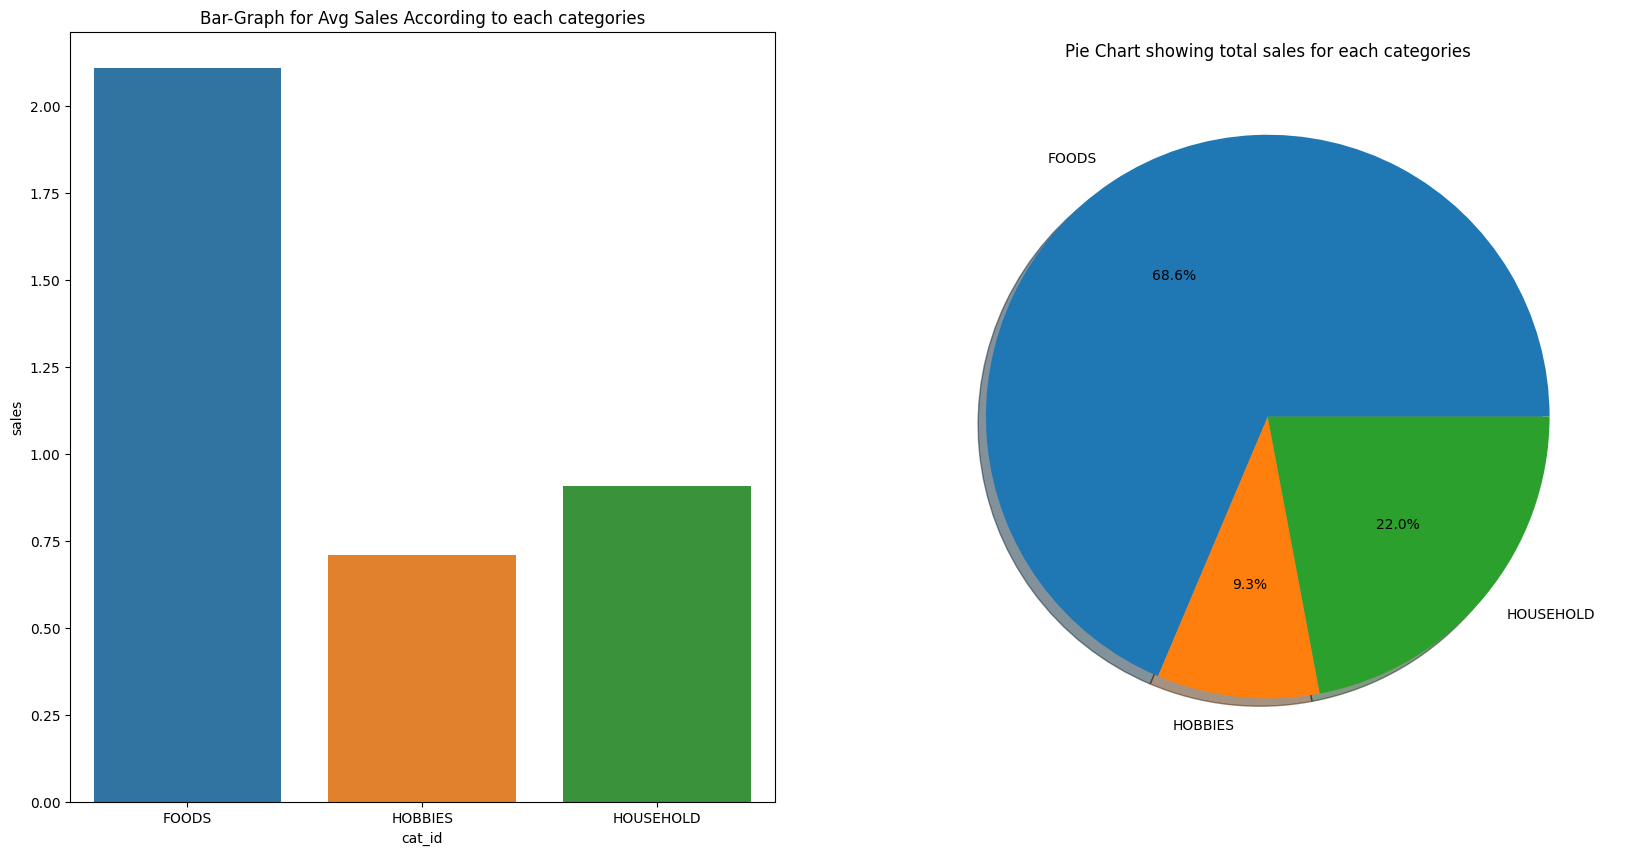

In [ ]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
#Total Sales for each Category(Bar Graph + Pie chart)
df=data.groupby('cat_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='cat_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each categories")

plt.subplot(122)
df=data.groupby('cat_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['perc'].values,labels=df['cat_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories")
plt.show()

In [ ]:
df.head()

,cat_id,sales,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,perc
0,FOODS,45089939,243367410692,85511962,136813992,43082088363,7026946,7035414,7036370,69476074.23,68.634840
1,HOBBIES,6124800,98302905771,34542490,55440672,17402546689,2837163,2841195,2841481,46028177.46,9.323026
2,HOUSEHOLD,14480670,181827750524,63904926,102264605,32195067406,5249975,5257069,5257647,87391094.20,22.042134
